In [68]:
from IPython.core.display import HTML # para alinear plots
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

<center><img src="logoucm.png" style="height: 100px"></center>
<center style="color:#888">Clasificación de un dataset<br/></center>

# <center><span style="color:#2E4574">Predicción laboral</center>

<div style="text-align: left;color:#3D5C9A"> Nuria Jiménez Carrasco<br>Sofía Maceín Sanz<br>Alicia Mayorga Caballero </div>

# <span style="color:#A04A3F"><u>Tabla de contenidos</u>

###  <span style="color:#3D5C9A">▷ 0. Introducción
###  <span style="color:#3D5C9A">▷ 1. Exploración y tratamiento de los datos
###  <span style="color:#3D5C9A">▷ 2. Balanceo y división de los datos
###  <span style="color:#3D5C9A">▷ 3. Uso y validación de modelos
###  <span style="color:#3D5C9A">▷ 4. Conclusiones

# <span style="color:#A04A3F"><u>Tabla de contenidos</u>

###  <span style="color:#A04A3F">▷ 0. Introducción
###  <span style="color:#AABDDC">▷ 1. Exploración y tratamiento de los datos
###  <span style="color:#AABDDC">▷ 2. Balanceo y división de los datos
###  <span style="color:#AABDDC">▷ 3. Uso y validación de modelos
###  <span style="color:#AABDDC">▷ 4. Conclusiones

## <span style="color:#A04A3F"> 0.1 Objetivo y selección del dataset

Vamos a realizar un estudio con el objetivo de crear modelos para predecir si un empleado va a continuar o no en una empresa basándonos en una serie de características. Para ello haremos uso del dataset ficticio [HR Employee Attrition](https://www.kaggle.com/datasets/whenamancodes/hr-employee-attrition), creado por IBM. 

Este conjunto de datos recoge diferentes factores que podrían influir en el despido de un trabajador, el cual podría ser voluntario, involuntario, por causas personales o profesionales, etc.

## <span style="color:#A04A3F"> 0.2 Librerías

Para poder llevar a cabo el estudio necesitaremos las siguientes librerías:

In [2]:
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt    

from scipy import stats
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

%matplotlib inline     
sns.set(color_codes=True)

Para evitar que salgan *FutureWarning*, definimos la función:

In [3]:
import warnings

def function_that_warns():
    warnings.warn("deprecated", DeprecationWarning)

# <span style="color:#A04A3F"><u>Tabla de contenidos</u>

###  <span style="color:#AABDDC">▷ 0. Introducción
###  <span style="color:#A04A3F">▷ 1. Exploración y tratamiento de los datos
###  <span style="color:#AABDDC">▷ 2. Balanceo y división de los datos
###  <span style="color:#AABDDC">▷ 3. Uso y validación de modelos
###  <span style="color:#AABDDC">▷ 4. Conclusiones

Comenzamos importando los datos en forma de data frame.

In [4]:
df = pd.read_csv("HR Employee Attrition.csv")

Realizamos una exploración visual de los datos para ver su dimensión y las variables que contiene.

In [5]:
# Dimension de los datos
df.shape

(1470, 35)

In [6]:
# Cabecera
pd.options.display.max_columns = None 
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


Profundizamos en las variables viendo su tipología y si existen valores nulos. 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Para llevar a cabo nuestro objetivo no trabajaremos con todo el dataset, si no con una selección de las variables que lo forman. 

In [8]:
df = df[['Attrition','Age','Gender','Education','JobLevel','JobSatisfaction','JobRole','DistanceFromHome','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

De esta forma, nos quedamos con las siguiente variables de segmentación:

* _Age_: Edad del trabajador
* _Gender_: Género del trabajador
* _Education_: Nivel de estudios
* _JobLevel_: Rango del trabajador
* _JobSatisfaction_: Nivel satisfacción con el trabajo
* _JobRole_: Empleo del trabajador

Las variables de modelización:
* _DistanceFromHome_: Distancia al trabajo
* _MonthlyIncome_: Salario mensual
* _NumCompaniesWorked_: Número de empresas para las que ha trabajado
* _PercentSalaryHike_: Porcentaje de aumento salarial
* _TotalWorkingYears_: Número total de años trabajados
* _YearsAtCompany_: Antigüedad en la empresa
* _YearsInCurrentRole_: Antigüedad en el puesto de trabajo
* _YearsSinceLastPromotion_: Años desde el último ascenso
* _YearsWithCurrManager_: Años con el mismo jefe

Y la variable de etiqueta:
* _Attrition_: representa si el empleado ha abandonado la empresa

Veamos las dimensiones de nuestro nuevo dataset.

In [9]:
df.shape

(1470, 16)

A pesar de que el dataset original no tenía datos missing, volvemos a comprobar esta condición en el nuevo. Esta comprobación asegura que no ha habido problemas en la transcripción de datos. 

In [10]:
df.isnull().sum()

Attrition                  0
Age                        0
Gender                     0
Education                  0
JobLevel                   0
JobSatisfaction            0
JobRole                    0
DistanceFromHome           0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
TotalWorkingYears          0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

Por último comprobamos que no existen observaciones duplicadas.

In [11]:
df[df.duplicated()].sum()

Attrition                  0.0
Age                        0.0
Gender                     0.0
Education                  0.0
JobLevel                   0.0
JobSatisfaction            0.0
JobRole                    0.0
DistanceFromHome           0.0
MonthlyIncome              0.0
NumCompaniesWorked         0.0
PercentSalaryHike          0.0
TotalWorkingYears          0.0
YearsAtCompany             0.0
YearsInCurrentRole         0.0
YearsSinceLastPromotion    0.0
YearsWithCurrManager       0.0
dtype: float64

## <span style="color:#A04A3F"> 1.1 Reasignación de variables

Teniendo en cuenta las características de las variables anteriormente mencionadas y su posterior uso, reasignamos algunos valores de las variables. Concretamente, transformamos la variable cualitativa *Attrition* (futura variable target) en una variable numérica binaria.

In [12]:
df.Attrition = df.Attrition.map({'Yes':1, 'No':0})

## <span style="color:#A04A3F"> 1.2 Análisis descriptivo

Obtenemos los estadísticos más significativos para hacernos una primera idea de cómo se distribuyen los datos en función de las diferentes variables a considerar.

In [13]:
df.describe()

,Attrition,Age,Education,JobLevel,JobSatisfaction,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,0.161224,36.923810,2.912925,2.063946,2.728571,9.192517,6502.931293,2.693197,15.209524,11.279592,7.008163,4.229252,2.187755,4.123129
std,0.367863,9.135373,1.024165,1.106940,1.102846,8.106864,4707.956783,2.498009,3.659938,7.780782,6.126525,3.623137,3.222430,3.568136
min,0.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,30.000000,2.000000,1.000000,2.000000,2.000000,2911.000000,1.000000,12.000000,6.000000,3.000000,2.000000,0.000000,2.000000
50%,0.000000,36.000000,3.000000,2.000000,3.000000,7.000000,4919.000000,2.000000,14.000000,10.000000,5.000000,3.000000,1.000000,3.000000
75%,0.000000,43.000000,4.000000,3.000000,4.000000,14.000000,8379.000000,4.000000,18.000000,15.000000,9.000000,7.000000,3.000000,7.000000
max,1.000000,60.000000,5.000000,5.000000,4.000000,29.000000,19999.000000,9.000000,25.000000,40.000000,40.000000,18.000000,15.000000,17.000000


A la vista de la tabla, cabe destacar:
* El rango de edad es de 18 a 60, lo que comprende todas las posibles edades laborales. 
* El salario medio es de 6502.93 y la mediana 4919 por lo que los datos están desplazados hacia valores bajos de salario. Además, el mínimo es de 1009 y el máximmo de 19999.
* La media de antigüedad en la empresa es de 7 años con una varianza de 6. Además, hay empleados recien llegados y empleados con 40 años de antigüedad.
* En media, los empleados promocionan cada 2/3 años.

Complementamos esta información con un gráfico que recoge el número de empleados en cada puesto de trabajo.

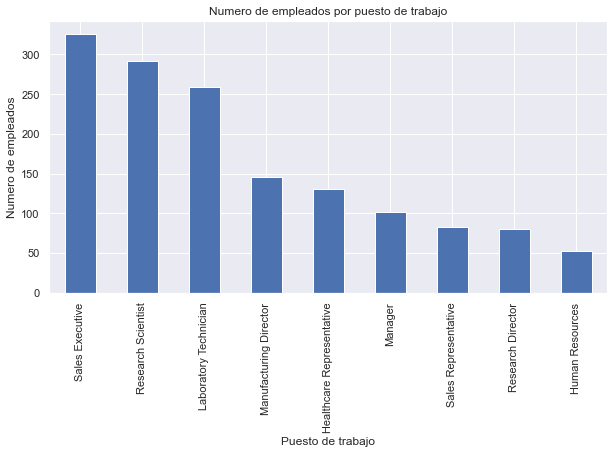

In [14]:
df.JobRole.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5)) 
plt.title("Numero de empleados por puesto de trabajo")
plt.ylabel('Numero de empleados')
plt.xlabel('Puesto de trabajo');

El dataset está formado principalmente por empleados del ámbito de ventas y por científicos de investigación y, en menor medida, por empleados del ámbito de los recursos humanos y directores de investigación. Además de las conclusiones generales ya mencionadas, podemos sacar algunas más segmentando por ciertas variables de interés:

* **Segmentación por edad**

Vemos cómo afecta la edad a la continuidad de una persona en su puesto de trabajo.

Text(0, 0.5, 'Attrition')

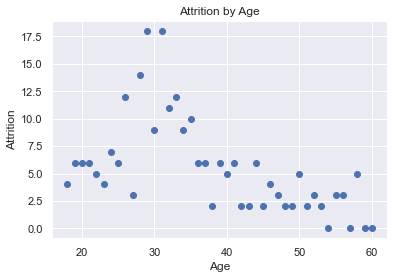

In [15]:
# Agrupacion
edad = df.groupby(by=['Age']).sum()

# Representacion grafica
plt.scatter(range(18,61), edad.Attrition)
plt.title('Attrition by Age')
plt.xlabel('Age')
plt.ylabel('Attrition')

Vemos que los despidos se centran en torno a los 30 años, siendo cada vez menores según aumenta la edad.

* **Segmentación por sexo**

Vemos cómo afecta el género del trabajador sobre el resto de variables.

In [16]:
# Segmentacion
sex_est = df.groupby(by=['Gender'])

# Descriptivo
sex_est.describe()

Attrition                                                 Age  \
           count      mean       std  min  25%  50%  75%  max  count   
Gender                                                                 
Female     588.0  0.147959  0.355362  0.0  0.0  0.0  0.0  1.0  588.0   
Male       882.0  0.170068  0.375906  0.0  0.0  0.0  0.0  1.0  882.0   

                                                          Education            \
             mean       std   min   25%   50%   75%   max     count      mean   
Gender                                                                          
Female  37.329932  9.266083  18.0  31.0  36.0  44.0  60.0     588.0  2.933673   
Male    36.653061  9.042329  18.0  30.0  35.0  42.0  60.0     882.0  2.899093   

                                          JobLevel                           \
             std  min  25%  50%  75%  max    count      mean       std  min   
Gender                                                                        
Female  1.007986  1.0  2.0  3.0  4.0  5.0    588.0  2.117347  1.095836  1.0   
Male    1.035148  1.0  2.0  3.0  4.0  5.0    882.0  2.028345  1.113477  1.0   

                           JobSatisfaction                                     \
        25%  50%  75%  max           count      mean       std  min  25%  50%   
Gender                                                                          
Female  1.0  2.0  3.0  5.0           588.0  2.683673  1.096038  1.0  2.0  3.0   
Male    1.0  2.0  3.0  5.0           882.0  2.758503  1.106970  1.0  2.0  3.0   

                 DistanceFromHome                                           \
        75%  max            count      mean       std  min  25%  50%   75%   
Gender                                                                       
Female  4.0  4.0            588.0  9.210884  8.231515  1.0  2.0  7.0  14.0   
Male    4.0  4.0            882.0  9.180272  8.027361  1.0  2.0  7.0  14.0   

             MonthlyIncome                                                    \
         max         count         mean          std     min     25%     50%   
Gender                                                                         
Female  29.0         588.0  6686.566327  4695.608507  1129.0  3037.0  5081.5   
Male    29.0         882.0  6380.507937  4714.856577  1009.0  2819.5  4837.5   

                         NumCompaniesWorked                                \
            75%      max              count      mean       std  min  25%   
Gender                                                                      
Female  8711.75  19973.0              588.0  2.812925  2.536084  0.0  1.0   
Male    8113.75  19999.0              882.0  2.613379  2.470521  0.0  1.0   

                      PercentSalaryHike                                   \
        50%  75%  max             count       mean       std   min   25%   
Gender                                                                     
Female  2.0  4.0  9.0             588.0  15.197279  3.700710  11.0  12.0   
Male    1.0  4.0  9.0             882.0  15.217687  3.634587  11.0  12.0   

                         TotalWorkingYears                                 \
         50%   75%   max             count       mean       std  min  25%   
Gender                                                                      
Female  14.0  18.0  25.0             588.0  11.726190  7.936601  0.0  6.0   
Male    14.0  18.0  25.0             882.0  10.981859  7.665222  0.0  6.0   

                          YearsAtCompany                                     \
         50%    75%   max          count      mean       std  min  25%  50%   
Gender                                                                        
Female  10.0  16.00  40.0          588.0  7.231293  6.004335  0.0  3.0  5.0   
Male     9.0  14.75  40.0          882.0  6.859410  6.205575  0.0  3.0  5.0   

                   YearsInCurrentRole                                          \
         75%   m

No se aprecia ninguna diferencia sustancial en los estadíticos entre géneros.

Enfocándonos en la futura variable target, realizamos un gráfico de barras de *Attrition* por géneros. Para evitar que la diferencia entre la cantidad de hombres y de mujeres encuestados sesguen los resultados, realizamos el gráfico por propoción.

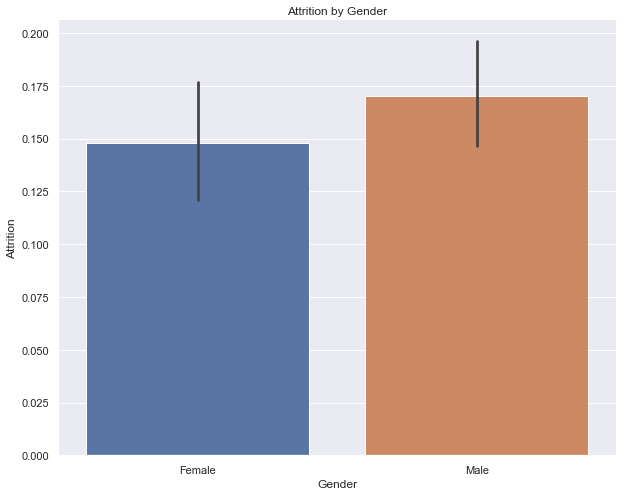

In [17]:
# Representacion grafica
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data = df, x = "Gender", y = "Attrition", ax=ax) 

plt.title('Attrition by Gender')
plt.xlabel('Gender')
plt.ylabel('Attrition')

sns.despine()
plt.show()

Esta gráfica se representa, por un lado, en barras, el porcentaje de hombres y de mujeres que se han ido de la empresa, y, por otro lado, con líneas, el intervalo de confianza para la media. 
A partir del gráfico, observamos que el género no influye en la variable *Attrition*.

* **Segmentación por nivel de estudios**

Veamos cómo influye el nivel de estudios sobre el resto de variables.

In [18]:
# Segmentacion
edu_est = df.groupby(by=['Education'])

# Descriptivo
edu_est.describe()

Attrition                                                 Age  \
              count      mean       std  min  25%  50%  75%  max  count   
Education                                                                 
1             170.0  0.182353  0.387276  0.0  0.0  0.0  0.0  1.0  170.0   
2             282.0  0.156028  0.363527  0.0  0.0  0.0  0.0  1.0  282.0   
3             572.0  0.173077  0.378645  0.0  0.0  0.0  0.0  1.0  572.0   
4             398.0  0.145729  0.353278  0.0  0.0  0.0  0.0  1.0  398.0   
5              48.0  0.104167  0.308709  0.0  0.0  0.0  0.0  1.0   48.0   

                                                               JobLevel  \
                mean       std   min    25%   50%    75%   max    count   
Education                                                                 
1          32.164706  9.186235  18.0  25.00  30.0  38.00  59.0    170.0   
2          36.861702  8.955327  18.0  30.00  36.0  42.00  59.0    282.0   
3          36.479021  9.152029  18.0  29.75  35.0  43.00  60.0    572.0   
4          39.281407  8.469903  22.0  33.00  37.0  45.75  60.0    398.0   
5          39.895833  7.842165  27.0  33.75  38.5  44.25  56.0     48.0   

                                                       JobSatisfaction  \
               mean       std  min  25%  50%  75%  max           count   
Education                                                                
1          1.794118  1.054138  1.0  1.0  1.0  2.0  5.0           170.0   
2          2.042553  1.052855  1.0  1.0  2.0  2.0  5.0           282.0   
3          2.068182  1.149386  1.0  1.0  2.0  3.0  5.0           572.0   
4          2.133166  1.081027  1.0  1.0  2.0  3.0  5.0           398.0   
5          2.520833  1.110675  1.0  2.0  2.0  3.0  5.0            48.0   

                                                       DistanceFromHome  \
               mean       std  min  25%  50%  75%  max            count   
Education                                                                 
1          2.800000  1.096525  1.0  2.0  3.0  4.0  4.0            170.0   
2          2.769504  1.100013  1.0  2.0  3.0  4.0  4.0            282.0   
3          2.652098  1.103860  1.0  2.0  3.0  4.0  4.0            572.0   
4          2.786432  1.093658  1.0  2.0  3.0  4.0  4.0            398.0   
5          2.666667  1.190983  1.0  1.0  3.0  4.0  4.0             48.0   

                                                           MonthlyIncome  \
                mean       std  min  25%  50%    75%   max         count   
Education                                                                  
1           8.741176  8.267929  1.0  2.0  6.0  13.00  29.0         170.0   
2           9.205674  8.050568  1.0  2.0  7.0  14.75  29.0         282.0   
3           9.243007  8.014569  1.0  2.0  7.0  14.00  29.0         572.0   
4           9.145729  8.134813  1.0  2.0  7.0  13.75  29.0         398.0   
5          10.500000  8.886997  1.0  2.0  8.0  18.00  29.0          48.0   

                                                                        \
                  mean          std     min      25%     50%       75%   
Education                                                                
1          5640.570588  4484.500308  1009.0  2693.00  3849.0   7170.25   
2          6226.645390  4524.683862  1051.0  3067.25  4891.5   6840.00   
3          6517.263986  4817.402573  1081.0  2759.75  4762.0   8808.00   
4          6832.402010  4657.191476  1359.0  3482.75  5341.5   8726.50   
5          8277.645833  5061.430495  2127.0  4731.25  6203.0  11731.50   

                   NumCompaniesWorked                                     \
               max              count      mean       std  min  25%  50%   
Education                                                                  
1          19973.0              170.0  1.894118  2.186692  0.0  1.0  1.0   
2          19613.0              282.0  2.585106  2.449822  0.0  1.0  1.0   
3          19926.0              

De este cuadro podemos destacar:
* La mayoría de los trabajadores tienen un nivel de estudios intermedio (nivel 3- nivel 4).
* Los trabajadores con un nivel de estudios más alto, tienen, en media, un sueldo más alto.

Para ver con más detalle la relación entre los ingresos mensuales y el nivel de estudios, realizamos un gráfico.

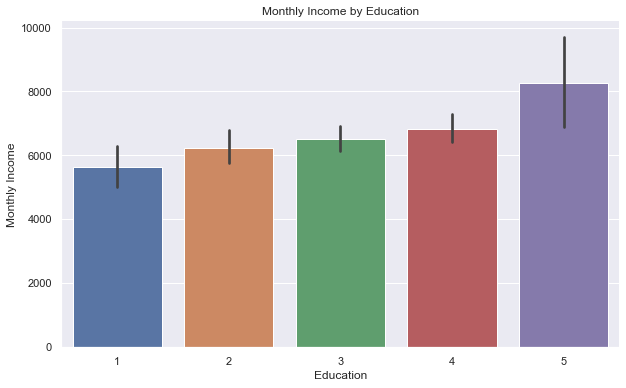

In [19]:
# Representacion grafica
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=df, x="Education", y="MonthlyIncome", ax=ax)

plt.title('Monthly Income by Education')
plt.xlabel('Education')
plt.ylabel('Monthly Income')

sns.despine()

plt.show()

## <span style="color:#A04A3F"> 1.3 Detección de outliers

Antes de trabajar con el dataset, debemos evaluar si existen outliers y si estos son significativos. Para ello, comenzamos creando una función que detecte los outliers siguiendo el método de Tukey.

In [20]:
def filtrar_outlier_tukey(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3 - q1 
    
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    
    outlier_indices = list(x.index[(x < floor)|(x > ceiling)])
    outlier_values = list(x[outlier_indices])

    return outlier_values

Aplicandola a nuestros datos, obtenemos:

In [21]:
# Outliers
print('Outliers DistanceFromHome:',filtrar_outlier_tukey(df.DistanceFromHome))
print('Outliers MonthlyIncome:',filtrar_outlier_tukey(df.MonthlyIncome))
print('Outliers NumCompaniesWorked:',filtrar_outlier_tukey(df.NumCompaniesWorked))
print('Outliers PercentSalaryHike:',filtrar_outlier_tukey(df.PercentSalaryHike))
print('Outliers YearsInCurrentRole:',filtrar_outlier_tukey(df.YearsInCurrentRole))
print('Outliers TotalWorkingYears:',filtrar_outlier_tukey(df.TotalWorkingYears))
print('Outliers YearsAtCompany:',filtrar_outlier_tukey(df.YearsAtCompany))
print('Outliers YearsSinceLastPromotion:',filtrar_outlier_tukey(df.YearsSinceLastPromotion))
print('Outliers YearsWithCurrManager:',filtrar_outlier_tukey(df.YearsWithCurrManager))

Outliers DistanceFromHome: []
Outliers MonthlyIncome: [19094, 18947, 19545, 18740, 18844, 18172, 17328, 16959, 19537, 17181, 19926, 19033, 18722, 19999, 16792, 19232, 19517, 19068, 19202, 19436, 16872, 19045, 19144, 17584, 18665, 17068, 19272, 18300, 16659, 19406, 19197, 19566, 18041, 17046, 17861, 16835, 16595, 19502, 18200, 16627, 19513, 19141, 19189, 16856, 19859, 18430, 17639, 16752, 19246, 17159, 17924, 17099, 17444, 17399, 19419, 18303, 19973, 19845, 17650, 19237, 19627, 16756, 17665, 16885, 17465, 19626, 19943, 18606, 17048, 17856, 19081, 17779, 19740, 18711, 18265, 18213, 18824, 18789, 19847, 19190, 18061, 17123, 16880, 17861, 19187, 19717, 16799, 17328, 19701, 17169, 16598, 17007, 16606, 19586, 19331, 19613, 17567, 19049, 19658, 17426, 17603, 16704, 19833, 19038, 19328, 19392, 19665, 16823, 17174, 17875, 19161, 19636, 19431, 18880]
Outliers NumCompaniesWorked: [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 

De la misma forma, podemos obtener esta información observando los boxplot.

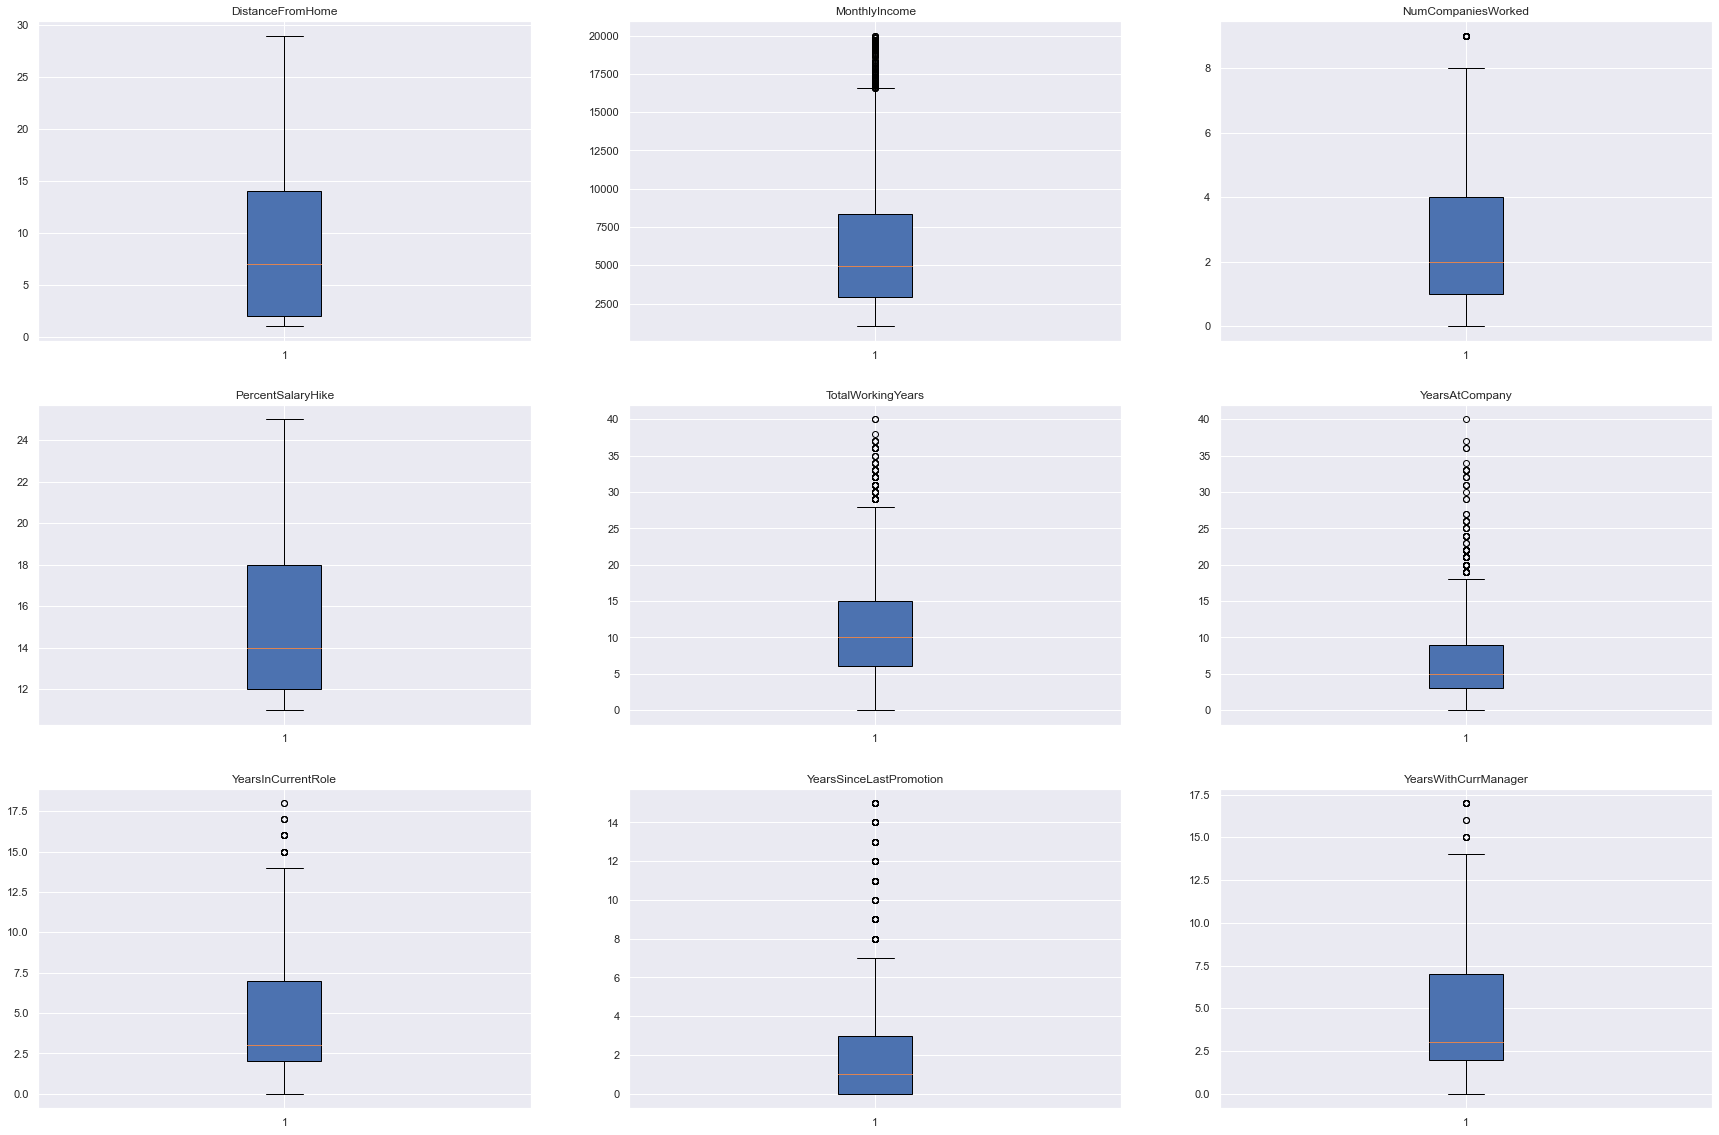

In [22]:
# Boxplots conjuntos 
plt.figure(figsize=(30,20))
plt.subplot(331),plt.boxplot(x=df['DistanceFromHome'],vert=True,patch_artist=True),plt.title('DistanceFromHome')
plt.subplot(332),plt.boxplot(x=df['MonthlyIncome'],vert=True,patch_artist=True),plt.title('MonthlyIncome')
plt.subplot(333),plt.boxplot(x=df['NumCompaniesWorked'],vert=True,patch_artist=True),plt.title('NumCompaniesWorked')
plt.subplot(334),plt.boxplot(x=df['PercentSalaryHike'],vert=True,patch_artist=True),plt.title('PercentSalaryHike')
plt.subplot(335),plt.boxplot(x=df['TotalWorkingYears'],vert=True,patch_artist=True),plt.title('TotalWorkingYears')
plt.subplot(336),plt.boxplot(x=df['YearsAtCompany'],vert=True,patch_artist=True),plt.title('YearsAtCompany')
plt.subplot(337),plt.boxplot(x=df['YearsInCurrentRole'],vert=True,patch_artist=True),plt.title('YearsInCurrentRole')
plt.subplot(338),plt.boxplot(x=df['YearsSinceLastPromotion'],vert=True,patch_artist=True),plt.title('YearsSinceLastPromotion')
plt.subplot(339),plt.boxplot(x=df['YearsWithCurrManager'],vert=True,patch_artist=True),plt.title('YearsWithCurrManager')
plt.show()

Tanto de forma analítica como de forma gráfica se detectan muchos posibles outlier. Sin embargo, no los consideraremos de esta manera ya que en realidad solo reflejan las desigualdades que existen en las variable estudiadas. Desde nuestro punto de vista, es normal que existan más personas con puestos de trabajos de nivel inferior que, a su vez, van asociados a sueldos más bajos; de la misma forma que consideramos normal que existan personas que hayan trabajao más de 30 años... y así con cada variable. 

## <span style="color:#A04A3F"> 1.4 Análisis de correlaciones

En un inicio hemos cogido variables que estaban relacionadas o que podían influir en el objetivo del estudio. Sin embargo, en esta recolección no se ha tenido en cuenta la posible redundancia de las mismas. Para solucionar esto, analizaremos las correlaciones entre las variables.

,Attrition,Age,Education,JobLevel,JobSatisfaction,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,1.000000,-0.159205,-0.031373,-0.169105,-0.103481,0.077924,-0.159840,0.043494,-0.013478,-0.171063,-0.134392,-0.160545,-0.033019,-0.156199
Age,-0.159205,1.000000,0.208034,0.509604,-0.004892,-0.001686,0.497855,0.299635,0.003634,0.680381,0.311309,0.212901,0.216513,0.202089
Education,-0.031373,0.208034,1.000000,0.101589,-0.011296,0.021042,0.094961,0.126317,-0.011111,0.148280,0.069114,0.060236,0.054254,0.069065
JobLevel,-0.169105,0.509604,0.101589,1.000000,-0.001944,0.005303,0.950300,0.142501,-0.034730,0.782208,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.103481,-0.004892,-0.011296,-0.001944,1.000000,-0.003669,-0.007157,-0.055699,0.020002,-0.020185,-0.003803,-0.002305,-0.018214,-0.027656
DistanceFromHome,0.077924,-0.001686,0.021042,0.005303,-0.003669,1.000000,-0.017014,-0.029251,0.040235,0.004628,0.009508,0.018845,0.010029,0.014406
MonthlyIncome,-0.159840,0.497855,0.094961,0.950300,-0.007157,-0.017014,1.000000,0.149515,-0.027269,0.772893,0.514285,0.363818,0.344978,0.344079
NumCompaniesWorked,0.043494,0.299635,0.126317,0.142501,-0.055699,-0.029251,0.149515,1.000000,-0.010238,0.237639,-0.118421,-0.090754,-0.036814,-0.110319
PercentSalaryHike,-0.013478,0.003634,-0.011111,-0.034730,0.020002,0.040235,-0.027269,-0.010238,1.000000,-0.020608,-0.035991,-0.001520,-0.022154,-0.011985
TotalWorkingYears,-0.171063,0.680381,0.148280,0.782208,-0.020185,0.004628,0.772893,0.237639,-0.020608,1.000000,0.628133,0.460365,0.404858,0.459188


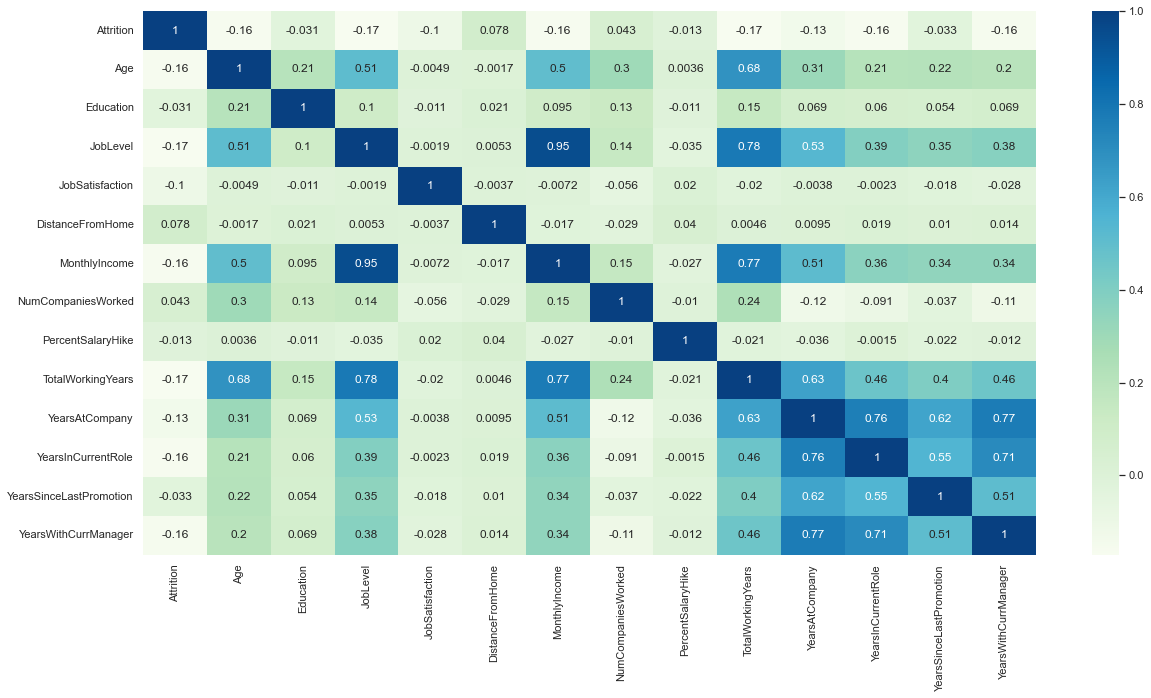

In [23]:
plt.figure(figsize=(20,10))
correlaciones= df.corr()
sns.heatmap(correlaciones,cmap="GnBu",annot=True) 
correlaciones

Podemos observar que existe un grupo de variables altamente correladas. Por tanto, podemos prescindir de las variables *TotalWorkingYears*, *YearsAtCompany*, *YearsSinceLastPromotion* y *YearsWithCurrManager*, .

In [24]:
df=df.drop(['TotalWorkingYears','YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager'],axis=1)

Comprobamos que hemos eliminado las redundancias viendo de nuevo la matriz de correlaciones.

,Attrition,Age,Education,JobLevel,JobSatisfaction,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,YearsInCurrentRole
Attrition,1.000000,-0.159205,-0.031373,-0.169105,-0.103481,0.077924,-0.159840,0.043494,-0.013478,-0.160545
Age,-0.159205,1.000000,0.208034,0.509604,-0.004892,-0.001686,0.497855,0.299635,0.003634,0.212901
Education,-0.031373,0.208034,1.000000,0.101589,-0.011296,0.021042,0.094961,0.126317,-0.011111,0.060236
JobLevel,-0.169105,0.509604,0.101589,1.000000,-0.001944,0.005303,0.950300,0.142501,-0.034730,0.389447
JobSatisfaction,-0.103481,-0.004892,-0.011296,-0.001944,1.000000,-0.003669,-0.007157,-0.055699,0.020002,-0.002305
DistanceFromHome,0.077924,-0.001686,0.021042,0.005303,-0.003669,1.000000,-0.017014,-0.029251,0.040235,0.018845
MonthlyIncome,-0.159840,0.497855,0.094961,0.950300,-0.007157,-0.017014,1.000000,0.149515,-0.027269,0.363818
NumCompaniesWorked,0.043494,0.299635,0.126317,0.142501,-0.055699,-0.029251,0.149515,1.000000,-0.010238,-0.090754
PercentSalaryHike,-0.013478,0.003634,-0.011111,-0.034730,0.020002,0.040235,-0.027269,-0.010238,1.000000,-0.001520
YearsInCurrentRole,-0.160545,0.212901,0.060236,0.389447,-0.002305,0.018845,0.363818,-0.090754,-0.001520,1.000000


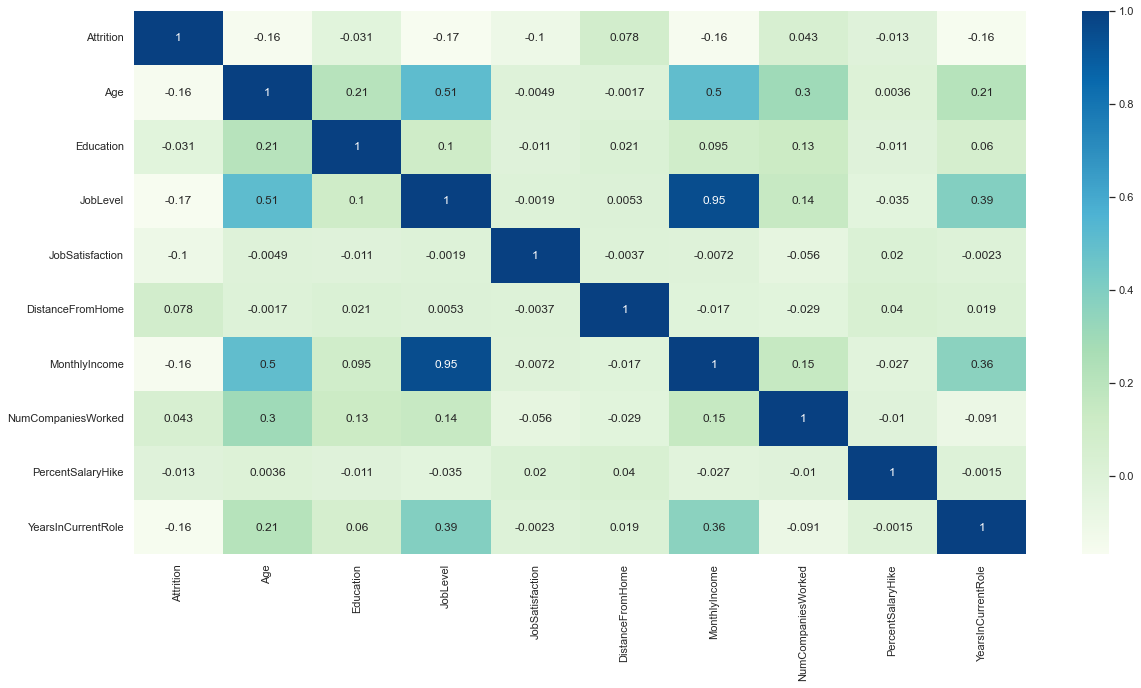

In [25]:
plt.figure(figsize=(20,10))
correlaciones= df.corr()
sns.heatmap(correlaciones,cmap="GnBu",annot=True) 
correlaciones

## <span style="color:#A04A3F"> 1.5 Contraste de normalidad

Para algunos métodos de clasificación es necesaria la existencia de normalidad en los datos, por lo que realizamos esta comprobación para poder aplicarlos. Para ello, usaremos un contraste de normalidad multidimensional.

In [26]:
# Creacion del data frame
df_normalidad = df
df_normalidad = df_normalidad.loc[:, "DistanceFromHome":"YearsInCurrentRole"]

df_normalidad.head()

,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,YearsInCurrentRole
0,1,5993,8,11,4
1,8,5130,1,23,7
2,2,2090,6,15,0
3,3,2909,1,11,7
4,2,3468,9,12,2


In [27]:
# Analisis normal multivariante 
from pingouin import multivariate_normality

multivariate_normality(df_normalidad, alpha=.05)

HZResults(hz=1397.0843771525845, pval=0.0, normal=False)

Como se puede observar el p-valor es de 0, lo que indica que tenemos evidencias para rechazar la hipótesis nula de normalidad. En cualquier caso, miramos la normalidad de las variables por separado (a través de test de normalidad univariante y qq-plots) por si fuera necesario realizar transformaciones.

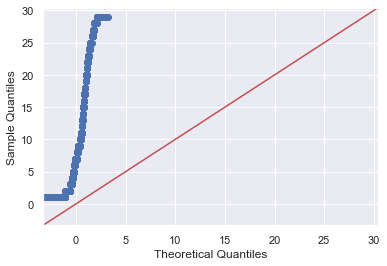

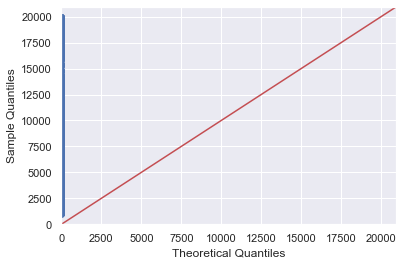

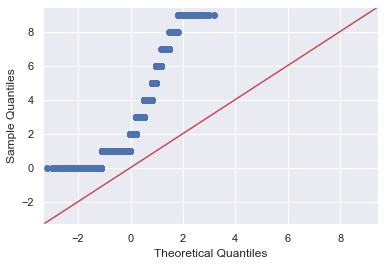

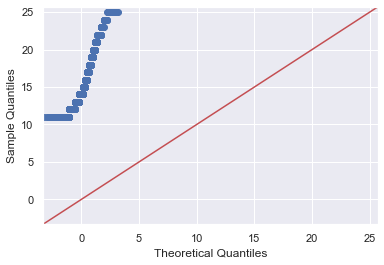

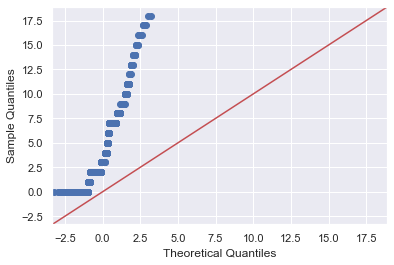

In [28]:
import statsmodels.api as sm
sm.qqplot(df.DistanceFromHome, line='45')
sm.qqplot(df.MonthlyIncome, line='45')
sm.qqplot(df.NumCompaniesWorked, line='45')
sm.qqplot(df.PercentSalaryHike, line='45')
sm.qqplot(df.YearsInCurrentRole, line='45')

plt.show()

## <span style="color:#A04A3F"> 1.6 Conclusión

A la vista del análisis anterior, creamos la matriz de observaciones y el vector etiqueta que emplearemos en el ajuste de los modelos.

In [29]:
# Matriz de observaciones
X = df.loc[:, "DistanceFromHome":"YearsInCurrentRole"]

# Vector etiqueta
y = df.Attrition

Visualizamos las variables creadas.

In [30]:
# Matriz de observaciones
X.head()

,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,YearsInCurrentRole
0,1,5993,8,11,4
1,8,5130,1,23,7
2,2,2090,6,15,0
3,3,2909,1,11,7
4,2,3468,9,12,2


In [31]:
# Vector etiqueta
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

# <span style="color:#A04A3F"><u>Tabla de contenidos</u>

###  <span style="color:#AABDDC">▷ 0. Introducción
###  <span style="color:#AABDDC">▷ 1. Exploración y tratamiento de los datos
###  <span style="color:#A04A3F">▷ 2. Balanceo y división de los datos
###  <span style="color:#AABDDC">▷ 3. Uso y validación de modelos
###  <span style="color:#AABDDC">▷ 4. Conclusiones

Para evitar que el sesgo de los datos influya en la capacidad predictiva de los modelos, debemos comprobar si este existe y, en caso de hacerlo, corregirlo.

Importamos lo paquetes necesarios para este apartado.

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from collections import Counter

Comprobamos la proporción de datos que existen con cada etiqueta, es decir, la proporción entre abandonos y continuidad en la empresa.

In [33]:
df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

Se ve claramente que los datos están desbalanceados, concretamente hay un 16,12% de despidos frente a un 83,88% que se quedan. Sin embargo, la correción no se hará sobre todo el dataset si no que, lo aplicaremos solo sobre los datos de entrenamiento de los modelos.

Para poder trabajar con los datos, necesitamos cambiar su tipología a arrays.

In [34]:
# Array matriz de observaciones
X = X.iloc[:, [0,1,2,3,4]].values
X

array([[   1, 5993,    8,   11,    4],
       [   8, 5130,    1,   23,    7],
       [   2, 2090,    6,   15,    0],
       ...,
       [   4, 6142,    1,   20,    2],
       [   2, 5390,    2,   14,    6],
       [   8, 4404,    2,   12,    3]], dtype=int64)

In [35]:
# Array vector target
y = y.values
y

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

A partir de la muestra creamos una submuestra de entrenamiento y otra de comprobación. De esta forma, usaremos el 70% de los datos para crear los modelos y el 30% para comprobarlos.

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Balanceamos los datos de entrenamiento para mejorar la precisión en la predicción del grupo minoritario. Para ello, definimos dos funciones auxiliares que nos permitirán mostrar los resultados del mismo.

In [37]:
# Funcion para crear el modelo 
def run_model(X_train, X_test, y_train, y_test):
    clf_base = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg")
    clf_base.fit(X_train, y_train)
    return clf_base

# Funcion para mostrar los resultados
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(12, 12))
    sns.heatmap(conf_matrix, xticklabels='x', yticklabels='y', annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))

Balanceamos nuestros datos mediante diferentes estrategias, para así poder elegir la más óptima. En todas ellas nos fijaremos en cómo afecta el balanceo al grupo minoritario (principalmente). Para ello, analizaremos la matriz de confusión, la precisión y el recall.

<center><img src="confusion_matix_example.png" width="1500" height="2000"></center>

* **Sin estrategia**

En primer lugar, ajustamos un modelo de regresión logística "desbalanceado" para ver los resultados que obtenemos y poder tener unas métricas para comparar.

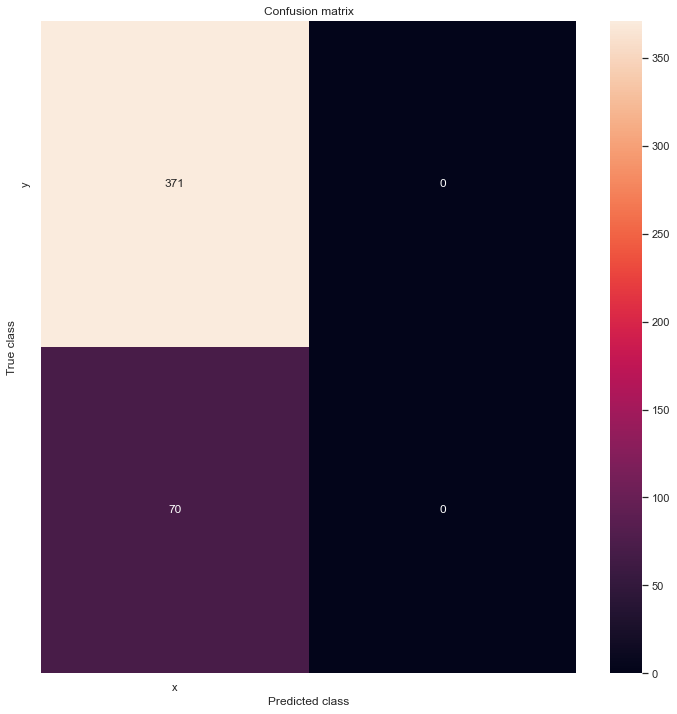

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       371
           1       0.00      0.00      0.00        70

    accuracy                           0.84       441
   macro avg       0.42      0.50      0.46       441
weighted avg       0.71      0.84      0.77       441



C:\Users\mayor\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mayor\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mayor\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
# Modelo
model = run_model(X_train, X_test, y_train, y_test)

# Predicciones
pred_y = model.predict(X_test)

# Resultados
mostrar_resultados(y_test, pred_y)

Si nos fijamos en la matriz de confusión en la clase minoritaria vemos que existen 70 fallos y 0 aciertos (es decir, 70 empleados se han ido cuando habíamos predicho que se iban a quedar). Obviamente, el recall que obtenemos es 0 (que es el valor que queremos mejorar). Por tanto, este modelo NO es capaz de predecir cuándo un empleado se va a ir.

* **Penalización para compensar**

<center><img src="weight.png" width="1500" height="1500"></center>

Ajustamos un modelo de regresión logística que balancee de forma autónoma los datos de entrenamiento. Para ello, añadimos el parámetro *class_weight = 'balanced'*.

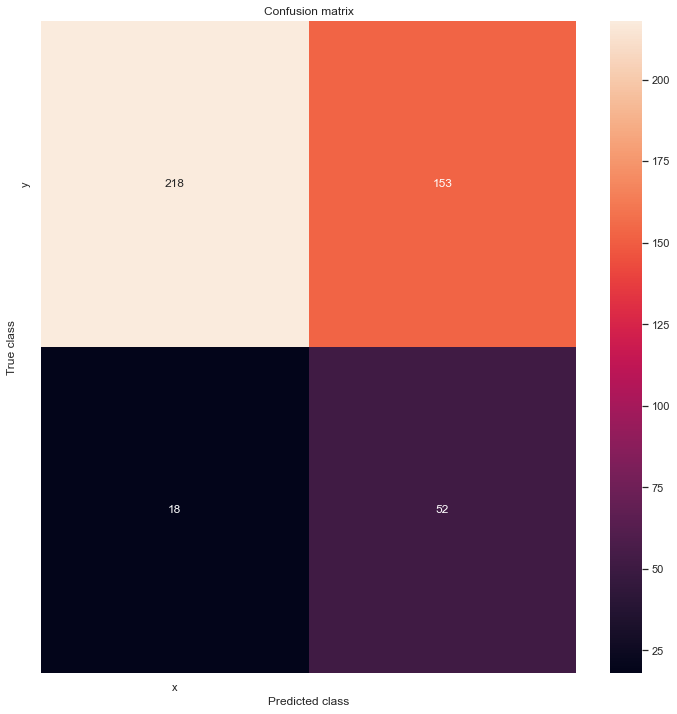

              precision    recall  f1-score   support

           0       0.92      0.59      0.72       371
           1       0.25      0.74      0.38        70

    accuracy                           0.61       441
   macro avg       0.59      0.67      0.55       441
weighted avg       0.82      0.61      0.66       441



In [39]:
# Funcion
def run_model_balanced(X_train, X_test, y_train, y_test):
    clf = LogisticRegression(C=1.0,penalty='l2',random_state=0,solver="newton-cg",class_weight="balanced")
    clf.fit(X_train, y_train)
    return clf

# Modelo
model = run_model_balanced(X_train, X_test, y_train, y_test)

# Predicciones
pred_y = model.predict(X_test)

# Resultados
mostrar_resultados(y_test, pred_y)

Como podemos ver en la matriz de confusión obtenemos, para la clase minoritaria , 18 fallos y 52 aciertos y un recall de 0.74. Esto es considerablemente mejor que el modelo anterior, pues ahora nuestro modelo es capaz de predecir de froma más precisa cuándo un empleado se va a ir. Como consecuencia, ha aumentado el número de "falsos positivos", es decir 153 de los empleados que hemos predicho que se iban a ir, finalmente se han quedado.  

* **Subsampling en la clase mayoritaria**

Probamos la técnica de subsampling, es decir, reducimos el número de observaciones en la clase mayoritaria.

In [40]:
from imblearn.under_sampling import NearMiss

Distribution before resampling Counter({0: 862, 1: 167})
Distribution after resampling Counter({0: 167, 1: 167})


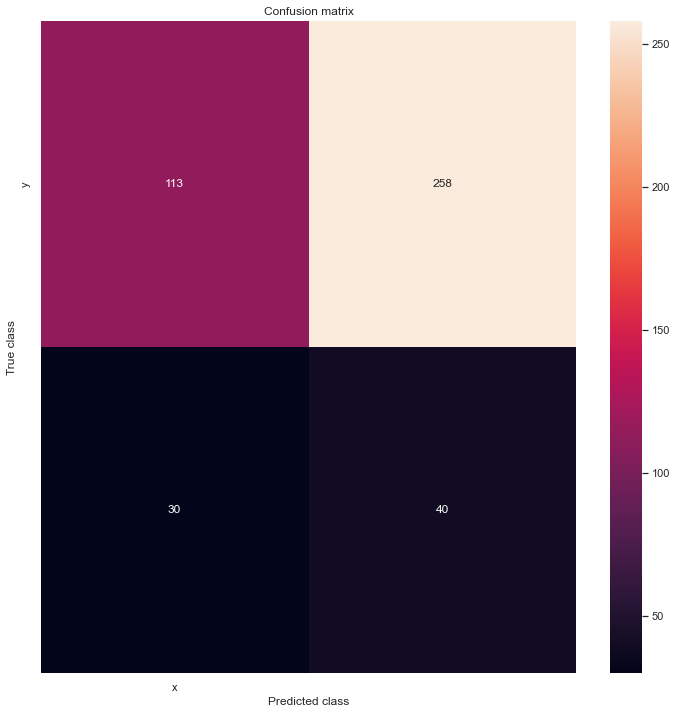

              precision    recall  f1-score   support

           0       0.79      0.30      0.44       371
           1       0.13      0.57      0.22        70

    accuracy                           0.35       441
   macro avg       0.46      0.44      0.33       441
weighted avg       0.69      0.35      0.40       441



In [41]:
# Undersampling
us = NearMiss()
X_train_res_us, y_train_res_us = us.fit_resample(X_train, y_train)
print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution after resampling {}".format(Counter(y_train_res_us)))

# Modelo
model = run_model(X_train_res_us, X_test, y_train_res_us, y_test)
# Prediccion
pred_y = model.predict(X_test)
# Resultados
mostrar_resultados(y_test, pred_y)

Como podemos ver en la matriz de confusión obtenemos, para la clase minoritaria, 30 fallos y 40 aciertos y un recall de 0.57. Sin embargo, en la clase mayoritaría tenemos 113 aciertos y 258 fallos, empeorando considerablemente con respecto a los otros modelos. Este empeoramiento de la clase mayoritaria también queda reflejado en el recall de 0.30.

* **Oversampling de la clase minoritaria**

Probamos la técnica de oversampling que crea nuevas muestras "sintéticas" de la clase minoritaría.

In [42]:
from imblearn.over_sampling import RandomOverSampler

Distribution before resampling Counter({0: 862, 1: 167})
Distribution labels after resampling Counter({0: 862, 1: 862})


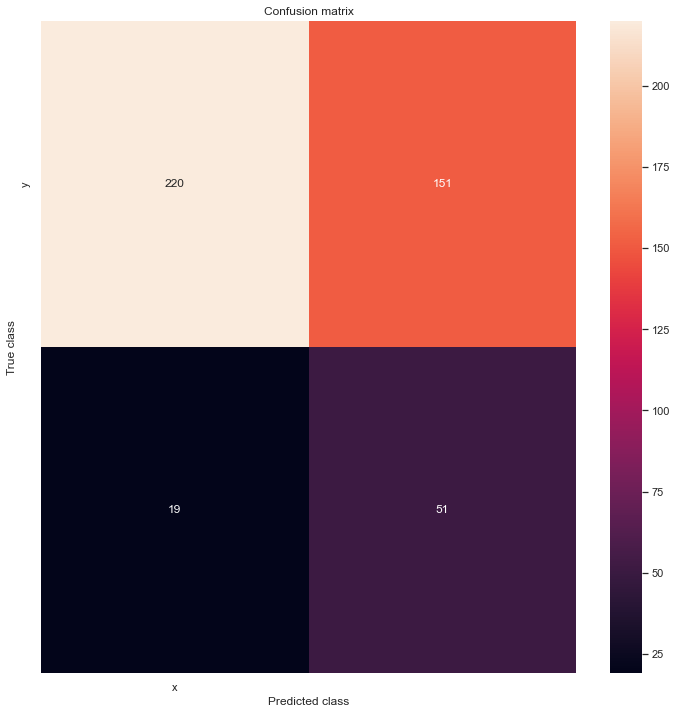

              precision    recall  f1-score   support

           0       0.92      0.59      0.72       371
           1       0.25      0.73      0.38        70

    accuracy                           0.61       441
   macro avg       0.59      0.66      0.55       441
weighted avg       0.81      0.61      0.67       441



In [43]:
# Oversampling
os =  RandomOverSampler()
X_train_res_os, y_train_res_os = os.fit_resample(X_train, y_train)
print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution labels after resampling {}".format(Counter(y_train_res_os)))
 
# Modelo
model = run_model(X_train_res_os, X_test, y_train_res_os, y_test)
# Prediccion
pred_y = model.predict(X_test)
# Resultado
mostrar_resultados(y_test, pred_y)

Como podemos ver en la matriz de confusión obtenemos, para la clase minoritaria, 19 fallos y 51 aciertos y un recall de 0.73. Mucho mejor que con la anterior estrategia y, por supuesto, que el modelo inicial. En la clase mayoritaría tenemos 225 aciertos, 146 fallos y un recall de 0.61.

* **Combinación resampling con Smote-Tomek**

Empleamos simultáneamente oversampling y undersampling, usando SMOTE para oversampling y TOMEK para undersampling.

In [44]:
from imblearn.combine import SMOTETomek

Distribution before resampling Counter({0: 862, 1: 167})
Distribution after resampling Counter({0: 752, 1: 752})


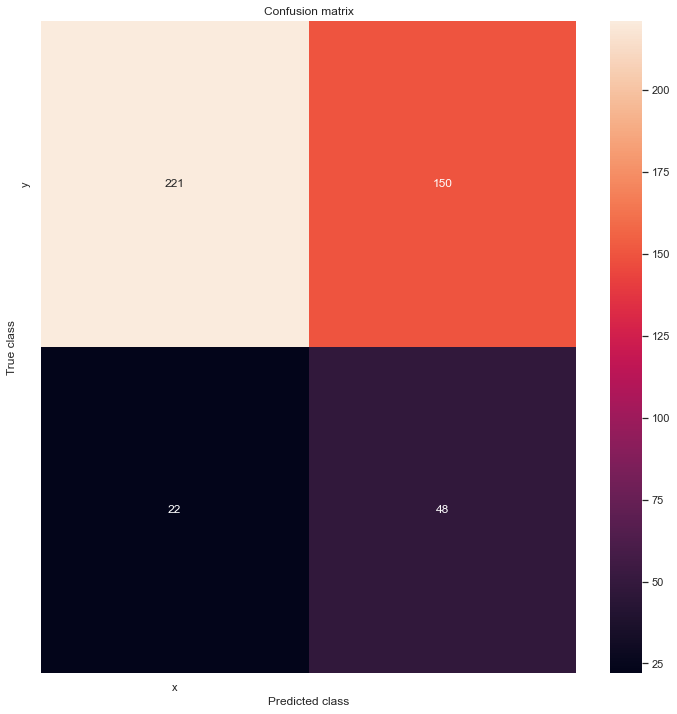

              precision    recall  f1-score   support

           0       0.91      0.60      0.72       371
           1       0.24      0.69      0.36        70

    accuracy                           0.61       441
   macro avg       0.58      0.64      0.54       441
weighted avg       0.80      0.61      0.66       441



In [45]:
# Oversampling-Undersampling
os_us = SMOTETomek()
X_train_res_osus, y_train_res_osus = os_us.fit_resample(X_train, y_train)
print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution after resampling {}".format(Counter(y_train_res_osus)))

# Modelo
model = run_model(X_train_res_osus, X_test, y_train_res_osus, y_test)
# Prediccion
pred_y = model.predict(X_test)
# Resultados
mostrar_resultados(y_test, pred_y)

Como podemos ver en la matriz de confusión obtenemos, para la clase minoritaria, 25 fallos y 45 aciertos y un recall de 0.64. En la clase mayoritaría tenemos 224 aciertos, 147 fallos y un recall de 0.60.


* **Conclusiones**

Tras comparar todas las estrategias, decidimos emplear OverSampling, que es la que obtiene un mayor recall en la clase minoritaria.

* **Balanceo**

Procedemos a balancear los datos con la estrategia escogida.

In [46]:
X_train, y_train = X_train_res_os, y_train_res_os

# <span style="color:#A04A3F"><u>Tabla de contenidos</u>

###  <span style="color:#AABDDC">▷ 0. Introducción
###  <span style="color:#AABDDC">▷ 1. Exploración y tratamiento de los datos
###  <span style="color:#AABDDC">▷ 2. Balanceo y división de los datos
###  <span style="color:#A04A3F">▷ 3. Uso y validación de modelos
###  <span style="color:#AABDDC">▷ 4. Conclusiones

Para mantener la coherencia entre las coclusiones y los resultados de los modelos, plantamos semilla en aquellos que empleen elementos aleatorios. Además, para poder comparar los modelos al final del estudio, vamos a ir almacenando las medidas de precisión (accuracy y matriz de confusión) en un diccionario.

In [47]:
acc_train = {}
acc_test = {}
mc = {}

## <span style="color:#3D5C9A"><u>Uso y validación de modelos</u>

###  <span style="color:#3D5C9A">► Árboles de decisión
###  <span style="color:#3D5C9A">► Regresión Logística
###  <span style="color:#3D5C9A">► Knn

## <span style="color:#3D5C9A"><u>Uso y validación de modelos</u>

###  <span style="color:#3D5C9A">► Árboles de decisión
###  <span style="color:#AABDDC">► Regresión Logística
###  <span style="color:#AABDDC">► Knn

Importamos los paquetes necesarios para este modelo concreto.

In [48]:
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier

Para trabajar de una forma más cómoda, renombramos a la función.

In [49]:
arbol = DecisionTreeClassifier()

Como desconocemos la profundidad óptima para discriminar bien los datos, realizamos una hiperparametrización sobre la misma.

In [50]:
# Posibles profundidades 
ps = np.array(range(3,10))
h_parameters = {'max_depth':ps}
cv = GridSearchCV(arbol, h_parameters,cv=10,n_jobs=-1,scoring = 'accuracy')
cv.fit(X_train,y_train)

# Mejor profundidad
cv.best_estimator_

DecisionTreeClassifier(max_depth=9)

Hemos obtenido una profundidad óptima de 9, por lo que ajustamos el modelo a la misma.

In [51]:
# Ajuste del modelo
arbol = DecisionTreeClassifier(max_depth=9, random_state = 0)
arbol.fit(X_train,y_train)

# Predeccion sobre los datos del test
y_pred_arbol_test = arbol.predict(X_test)
acc_test_arbol = accuracy_score(y_pred_arbol_test,y_test)
print('Accuracy test árbol: ', acc_test_arbol)

# Predeccion sobre los datos de train
y_pred_arbol_train = arbol.predict(X_train)
acc_train_arbol = accuracy_score(y_pred_arbol_train,y_train)
print('Accuracy train árbol: ', acc_train_arbol)

# Matriz de confusion
mc_arbol = metrics.confusion_matrix(y_test, y_pred_arbol_test)
print('Matriz de confusión árbol: ', mc_arbol)

# Almacenamos los datos
acc_test['arbol'] = acc_test_arbol
acc_train['arbol'] = acc_train_arbol
mc['arbol'] = mc_arbol

Accuracy test árbol:  0.7120181405895691
Accuracy train árbol:  0.8793503480278422
Matriz de confusión árbol:  [[294  77]
 [ 50  20]]


Realizamos el gráfico de árbol de decisión.

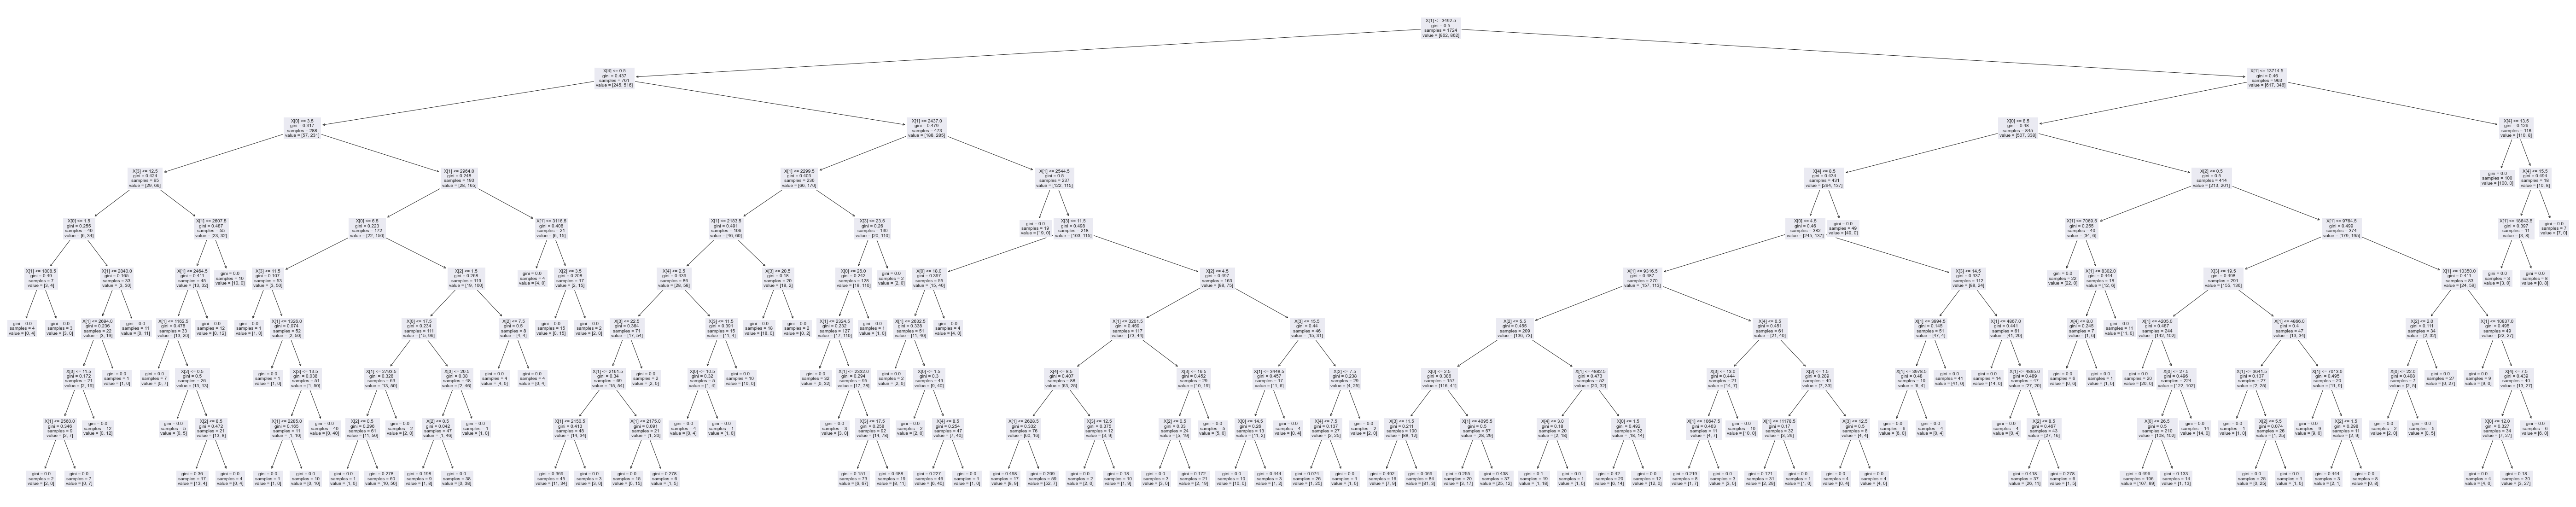

In [52]:
plt.figure(figsize=(100,20))
tree.plot_tree(arbol, fontsize=10)
plt.show()

A pesar de la gran profundidad del árbol, no conseguimos que finalice en una gran cantidad de nodos puros. Incluso, algunos nodos finales realizan una clasificación próxima al azar. 

De nuevo, representamos la matriz de confusión para evaluar el modelo.

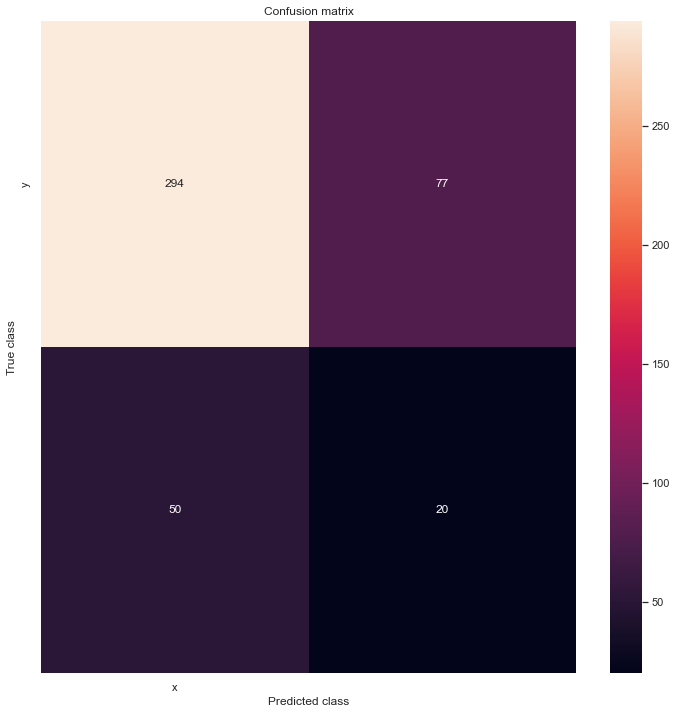

              precision    recall  f1-score   support

           0       0.85      0.79      0.82       371
           1       0.21      0.29      0.24        70

    accuracy                           0.71       441
   macro avg       0.53      0.54      0.53       441
weighted avg       0.75      0.71      0.73       441



In [53]:
mostrar_resultados(y_test, y_pred_arbol_test)

Analizando la parte de la clase minoritaria en la matriz de confusión, vemos que existen 45 fallos y 25 aciertos (es decir, 45 empleados se han ido cuando habíamos predicho que se iban a quedar). El recall que obtenemos es 0.36, bastante bajo. Por tanto, este modelo NO es capaz de predecir cuándo un empleado se va a ir.

Otra alternativa es utilizar *class_weight = 'balanced'*, que balancea los datos de forma autónoma, obteniendo:

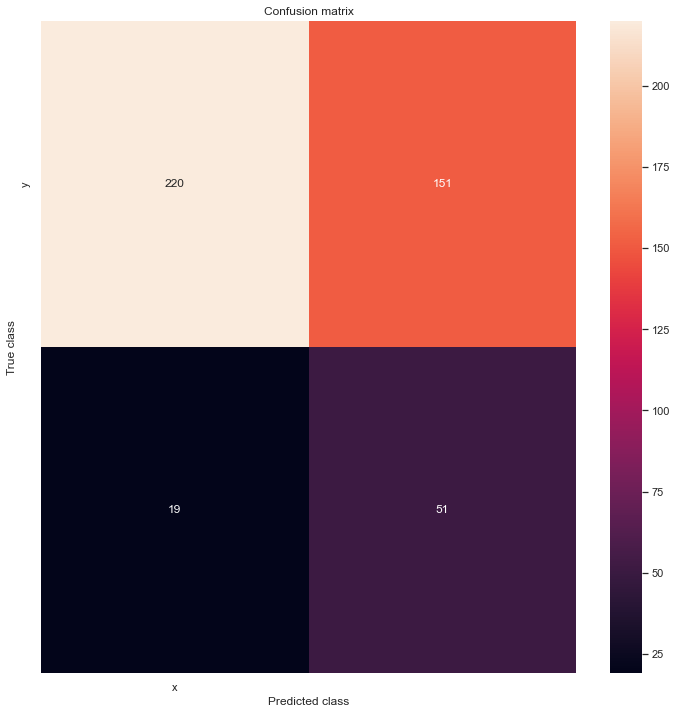

              precision    recall  f1-score   support

           0       0.92      0.59      0.72       371
           1       0.25      0.73      0.38        70

    accuracy                           0.61       441
   macro avg       0.59      0.66      0.55       441
weighted avg       0.81      0.61      0.67       441



In [54]:
# Ajuste del modelo
arbol = DecisionTreeClassifier(max_depth=9, random_state = 0, class_weight = "balanced")
arbol.fit(X_train,y_train)

# Aplicacion del modelo
model = run_model_balanced(X_train, X_test, y_train, y_test)

# Predicciones
pred_y = model.predict(X_test)

# Resultados
mostrar_resultados(y_test, pred_y)

Con el autobalanceado conseguimos una mejora significativa del modelo. Conseguimos que sea capaz de clasificar correctamente un gran número de observaciones de la clase minoritaria, mejorando sustancialmente su recall, sin perjudicar en exceso la clasificación de la clase mayoritaria.

Este modelo también puede ser usado para analizar la relevancia de cada variable a la hora de clasificar una observación.

Text(0, 0.5, 'Característica')

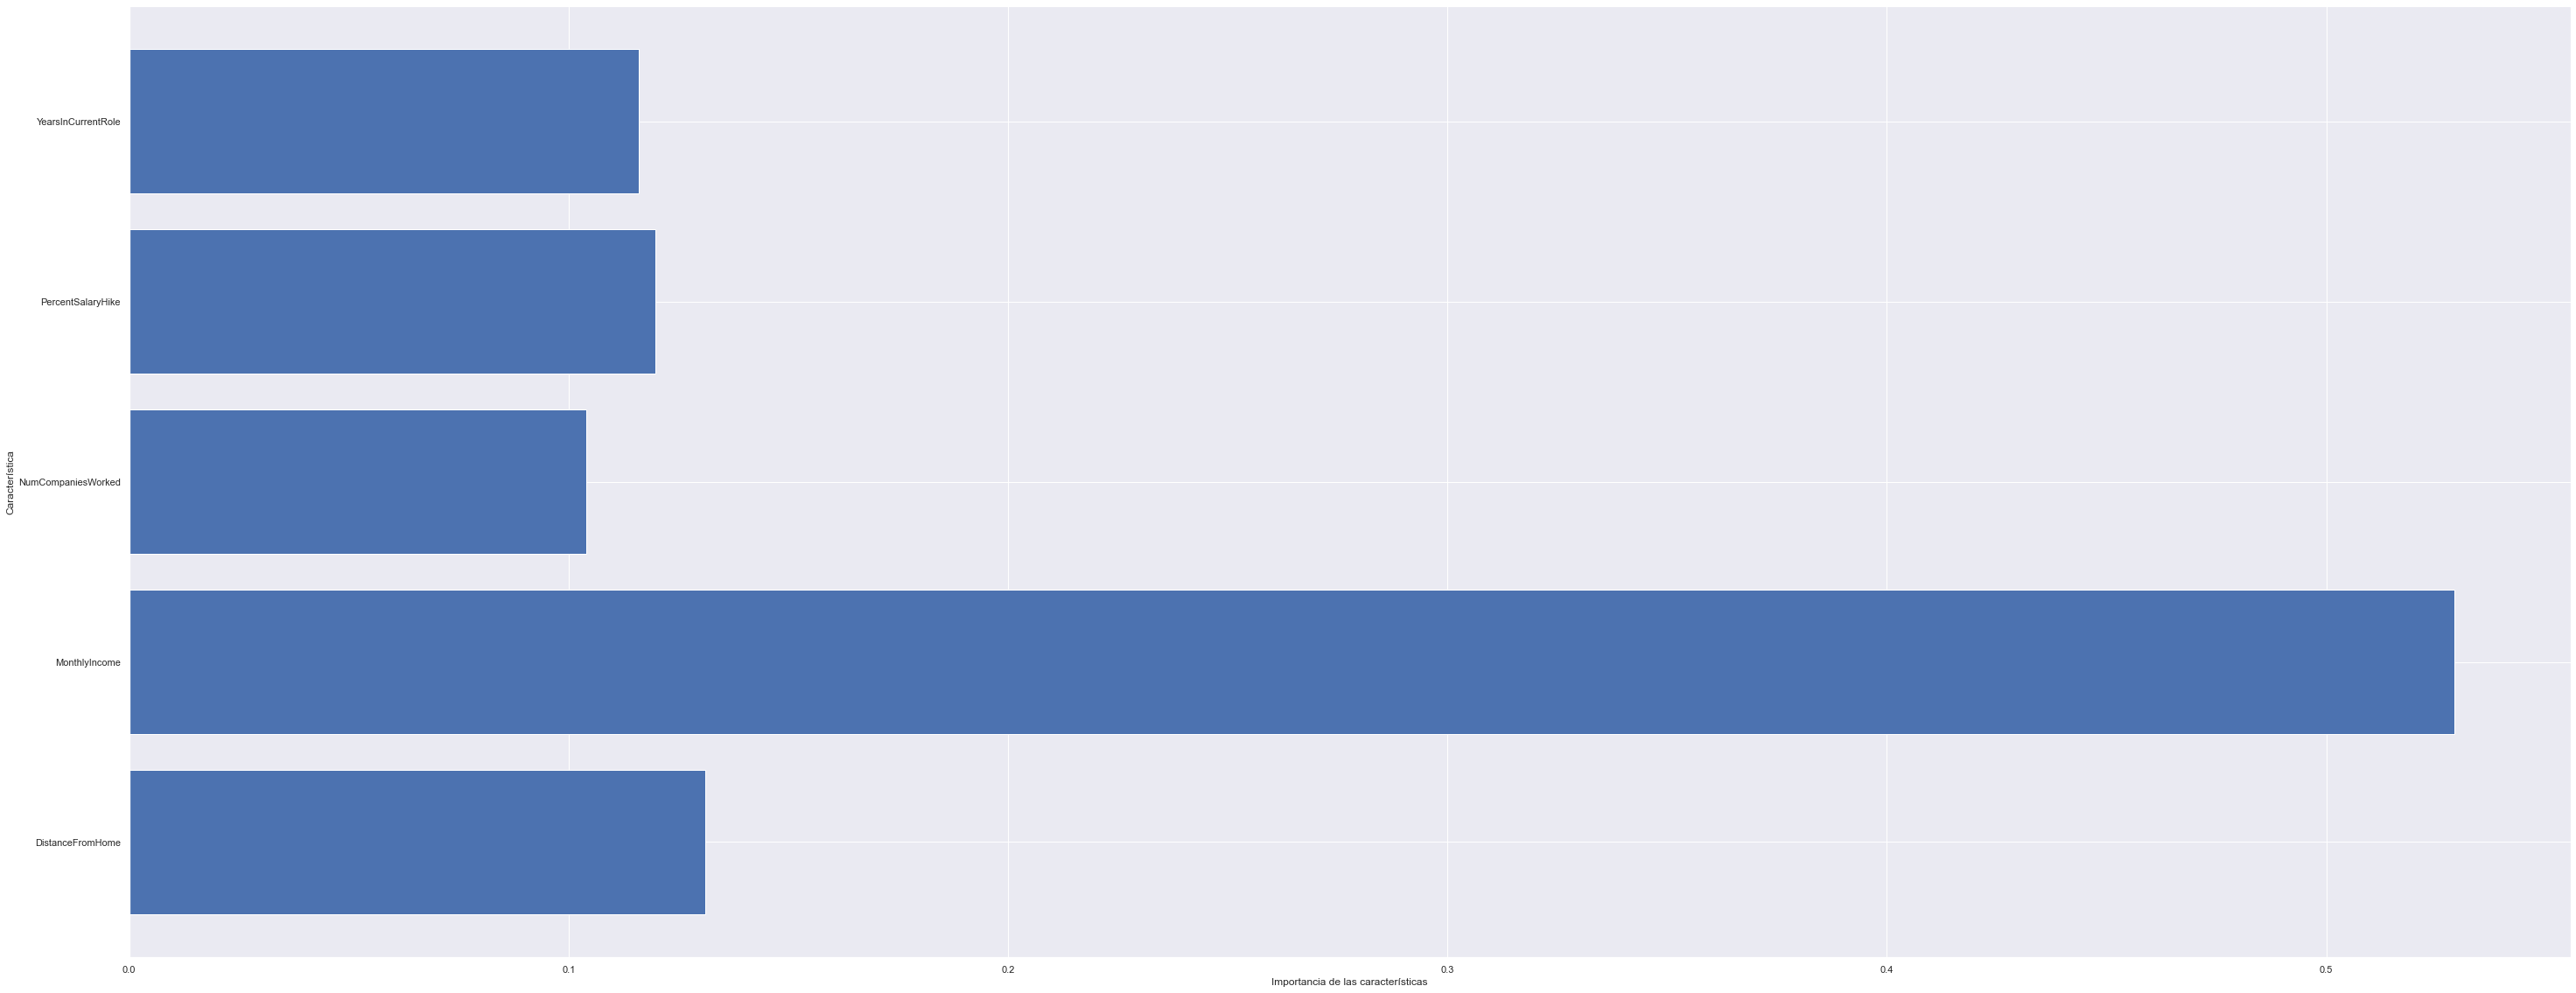

In [55]:
# Creacion del grafico
plt.figure(figsize=(50,20))
caract = X.shape[1] 
plt.barh(range(caract), arbol.feature_importances_) 

# Etiquetas del grafico
plt.yticks(np.arange(caract), ['DistanceFromHome', 'MonthlyIncome','NumCompaniesWorked', 'PercentSalaryHike',
       'YearsInCurrentRole'])  
plt.xlabel('Importancia de las características')
plt.ylabel('Característica')

## <span style="color:#3D5C9A"><u>Uso y validación de modelos</u>

###  <span style="color:#AABDDC">► Árboles de decisión
###  <span style="color:#3D5C9A">► Regresión Logística
###  <span style="color:#AABDDC">► Knn

Importamos los paquetes necesarios para este modelo concreto.

In [56]:
from sklearn.linear_model import LogisticRegression

Debido a las características particulares de este modelo, debemos eliminar las variables cualitativas. Para evitar perder información favorable para próximos modelos, en lugar de borrar dichas variables, creamos un nuevo dataset que no las recoja. 

In [57]:
dflog = df.drop(['Gender', 'JobRole'], axis=1)
dflog.head()

,Attrition,Age,Education,JobLevel,JobSatisfaction,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,YearsInCurrentRole
0,1,41,2,2,4,1,5993,8,11,4
1,0,49,1,2,2,8,5130,1,23,7
2,1,37,2,1,3,2,2090,6,15,0
3,0,33,4,1,3,3,2909,1,11,7
4,0,27,1,1,2,2,3468,9,12,2


Ajustamos el modelo a nuestros datos.

In [58]:
# Ajuste del modelo
LR = LogisticRegression(solver='lbfgs', max_iter=10000, random_state = 0)
LR.fit(X_train, y_train)

# Prediccion sobre los datos de test
acc_test_LR = LR.score(X_test, y_test)
print("Accuracy test LR: ", acc_test_LR)

# Prediccion sobre los datos de train
acc_train_LR = LR.score(X_train, y_train)
print("Accuracy train LR: ", acc_train_LR)

# Matriz de confusion
y_pred_LR = LR.predict(X_test)
mc_LR = metrics.confusion_matrix(y_test, y_pred_LR)
print("Matriz de confusión: ", mc_LR)

# Almacenamiento de datos
acc_test['LR'] = acc_test_LR
acc_train['LR'] = acc_train_LR
mc['LR'] = mc_LR

Accuracy test LR:  0.6145124716553289
Accuracy train LR:  0.6473317865429234
Matriz de confusión:  [[220 151]
 [ 19  51]]


Para reforzar la validación del modelo, realizamos Cross Validation.

En concreto la función cross_val_score() que utiliza k fold cross validation.
<center><img src="kfold.png"></center>

In [59]:
# Validacion cruzada
scores_LR = cross_val_score(LR, X_train, y_train, cv=5).mean()
print("Accuracy para validación cruzada: ", scores_LR)

Accuracy para validación cruzada:  0.6299427030670712


Analizamos la matriz de confusión.

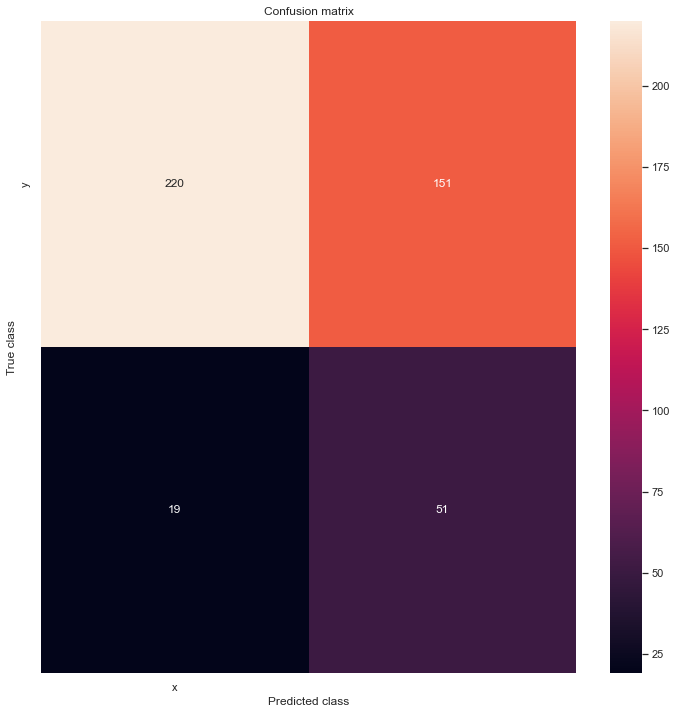

              precision    recall  f1-score   support

           0       0.92      0.59      0.72       371
           1       0.25      0.73      0.38        70

    accuracy                           0.61       441
   macro avg       0.59      0.66      0.55       441
weighted avg       0.81      0.61      0.67       441



In [60]:
mostrar_resultados(y_test, y_pred_LR)

Si nos fijamos en la matriz de confusión en la clase minoritaria, vemos que existen 19 fallos y 51 aciertos. El recall que obtenemos es 0.73, bastante más alto que en el anterior modelo. Por tanto, este modelo SÍ es capaz de predecir cuándo un empleado se va a ir.

Este modelo también acepta la variable *class_weight = 'balanced'*, tal y como se muestra en el balanceo de penalización para compensar. Sin embargo, la mejora que produce no es significativa. 

## <span style="color:#3D5C9A"><u>Uso y validación de modelos</u>

###  <span style="color:#AABDDC">► Árboles de decisión
###  <span style="color:#AABDDC">► Regresión Logística
###  <span style="color:#3D5C9A">► Knn

Importamos los paquetes necesarios para este modelo concreto.

In [61]:
from sklearn.neighbors import KNeighborsClassifier

Como desconocemos el número de vecinos óptimos, realizamos una hiperparametrización sobre los mismos.

In [62]:
ks = list(range(1, 16))

# En este diccionario iremos guardando las accuracies sobre test asociadas a cada valor de $k$
accs = {}

# Vamos recorriendo la rejilla con un bucle for...
for k in ks:
    
    # Definimos el modelo para cada parametro con el valor de hiperparametro correspondiente
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Ajustamos a los datos de entrenamiento
    knn.fit(X_train, y_train)
    
    # Hacemos predicciones sobre los datos de test
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        y_pred = knn.predict(X_test)
    
    # Evaluamos y guardamos la metrica correspondiente (en este caso accuracy)
    acc = metrics.accuracy_score(y_test, y_pred)
    accs[k] = acc

k = max(accs, key=accs.get)
print('El número óptimo de vecinos es:',k,'; con un accuracy de:',accs[k])

El número óptimo de vecinos es: 2 ; con un accuracy de: 0.7528344671201814


Para tomar una mejor decisión sobre cuántos vecinos tomar, realizamos un gráfico de codo.

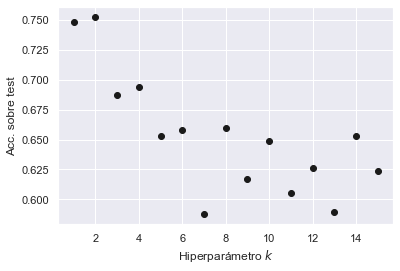

In [63]:
# Creacion del grafico
ks_arr = np.fromiter(accs.keys(), dtype=int)
accs_arr = np.fromiter(accs.values(), dtype=float)

# Etiquetas del grafico
plt.plot(ks_arr, accs_arr, 'ok')
plt.xlabel('Hiperparámetro $k$');
plt.ylabel('Acc. sobre test');

A la vista del gráfico nos quedamos con 2 vecinos. Como la variable target es binaria, tomamos 3 vecinos para evitar empates.

Ajustamos el modelo a nuestros datos.

In [64]:
# Ajuste del modelo
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Prediccion sobre los datos de test
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    y_pred_knn_test = knn.predict(X_test)
acc_test_knn = metrics.accuracy_score(y_test, y_pred_knn_test)
print("Accuracy test knn: ", acc_test_knn)

# Prediccion sobre los datos de train
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    y_pred_knn_train = knn.predict(X_train)
acc_train_knn = metrics.accuracy_score(y_train, y_pred_knn_train)
print("Accuracy train knn: ", acc_train_knn)

# Matriz de confusion
mc_knn = metrics.confusion_matrix(y_test, y_pred_knn_test)
print("Matriz de confusión: ", mc_knn)

# Almacenamiento de datos
acc_test['knn'] = acc_test_knn
acc_train['knn'] = acc_train_knn
mc['knn'] = mc_knn

Accuracy test knn:  0.6870748299319728
Accuracy train knn:  0.9292343387470998
Matriz de confusión:  [[282  89]
 [ 49  21]]


Analizamos la matriz de confusión.

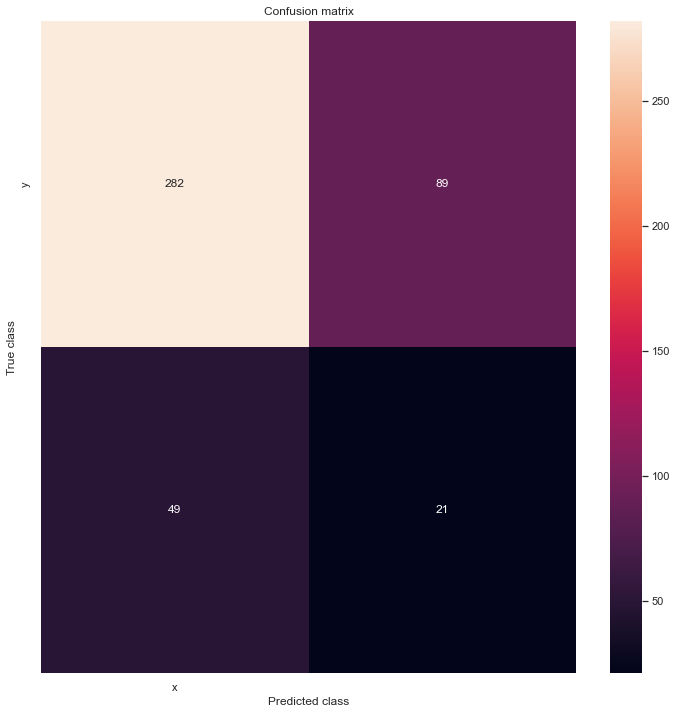

              precision    recall  f1-score   support

           0       0.85      0.76      0.80       371
           1       0.19      0.30      0.23        70

    accuracy                           0.69       441
   macro avg       0.52      0.53      0.52       441
weighted avg       0.75      0.69      0.71       441



In [65]:
mostrar_resultados(y_test, y_pred_knn_test)

Si nos fijamos en la clase minoritaria, vemos que existen 49 fallos y 21 aciertos. Además, el recall que obtenemos es 0.30 (más bajo que en el anterior modelo). Por tanto, este modelo NO es capaz de predecir cuándo un empleado se va a ir.

# <span style="color:#A04A3F"><u>Tabla de contenidos</u>

###  <span style="color:#AABDDC">▷ 0. Introducción
###  <span style="color:#AABDDC">▷ 1. Exploración y tratamiento de los datos
###  <span style="color:#AABDDC">▷ 2. Balanceo y división de los datos
###  <span style="color:#AABDDC">▷ 3. Uso y validación de modelos
###  <span style="color:#A04A3F">▷ 4. Conclusiones

Para decidir qué modelo es el más óptimo, nos fijamos en las medidas de precisión que hemos ido almacenando. 

In [66]:
print('Accuracy sobre los datos test: ', acc_test)
print('Accuracy sobre los datos train: ', acc_train)

Accuracy sobre los datos test:  {'arbol': 0.7120181405895691, 'LR': 0.6145124716553289, 'knn': 0.6870748299319728}
Accuracy sobre los datos train:  {'arbol': 0.8793503480278422, 'LR': 0.6473317865429234, 'knn': 0.9292343387470998}


In [67]:
print('Matrices de confusión: ', mc)

Matrices de confusión:  {'arbol': array([[294,  77],
       [ 50,  20]], dtype=int64), 'LR': array([[220, 151],
       [ 19,  51]], dtype=int64), 'knn': array([[282,  89],
       [ 49,  21]], dtype=int64)}


A la vista de los datos originales, es necesario balancear los datos de entrenamiento, siendo la forma más óptima el Oversampling (tal y como se concluye en el apartado 2). 

Por lo general, el ajuste de los modelos de predicción no es muy preciso. Sin embargo, destacamos la regresión logística como la mejor aproximación, ya que nuestro objetivo se centra en precedir con exactitud cuando un empleado abandona la empresa. Esta elección la tomamos basándonos en las diferentes métricas analizadas (recall, precisión, matriz de confusión, F1,...), ya que fijarnos solo en una de ellas puede llevarnos a error. 


<center><img src="ganador.png" width="1000" height="1500"></center>